In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

# Uploading dataset

df = pd.read_excel('Data.xlsx', engine='openpyxl')

# Separating numerical and categorical data
colonnes_numeriques = ['MT_ACCORD', 'Revenu_estime','DUR_P','Age']  
colonnes_categorielles=['m2_Wilaya','CATEGORIE','t24_Profession','CODE','t18_Genre','t23_EtatCivil','I_CLASS']


for col in colonnes_numeriques:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
for col in colonnes_categorielles:
    df[col] = df[col].astype(object)

# Univariate Analysis

In [15]:
df.shape

(185536, 11)

In [17]:
df[colonnes_categorielles].describe()

,m2_Wilaya,CATEGORIE,t24_Profession,CODE,t18_Genre,t23_EtatCivil,I_CLASS
count,185536,185536,185536,185536,185536,185536,185536
unique,48,6,62,215,2,4,2
top,16,1,1,359,1,2,0
freq,17727,89014,87256,4852,139544,128376,92771


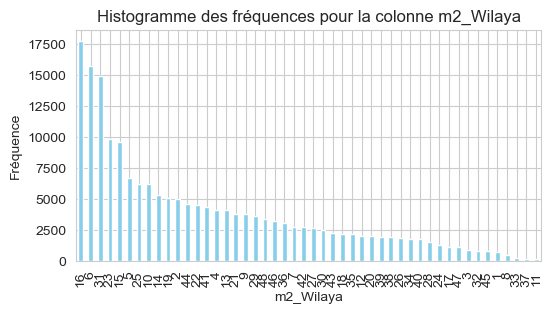

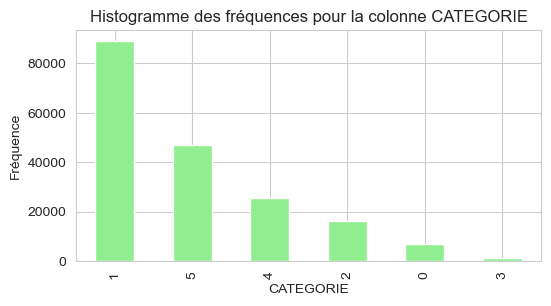

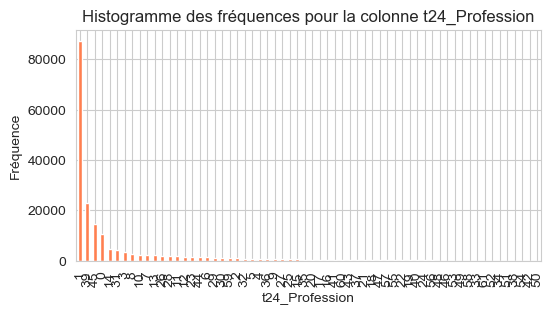

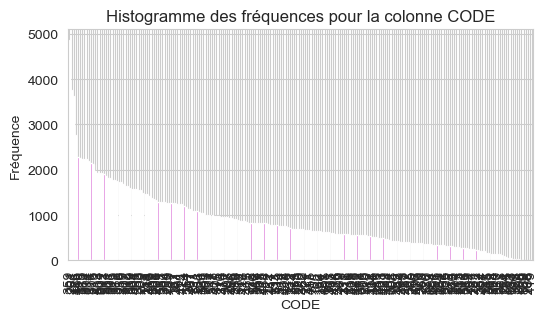

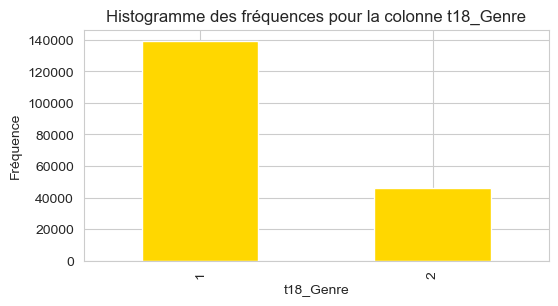

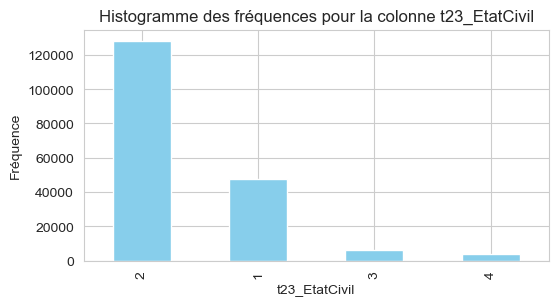

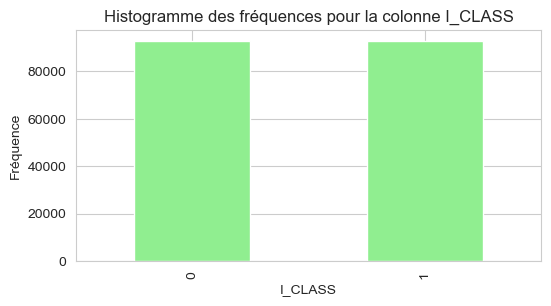

In [34]:
couleurs = ['skyblue', 'lightgreen', 'coral', 'orchid', 'gold']

# Créer des histogrammes pour chaque colonne catégorielle
for i, col in enumerate(colonnes_categorielles):
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar', color=couleurs[i % len(couleurs)])
    plt.title(f'Histogramme des fréquences pour la colonne {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [40]:
Class = df[df['I_CLASS'] == 0]
print('Descreptive statistics for class 0')
Class.describe()

Statistique descriptive pour la classe 0 (non défaut)


,MT_ACCORD,DUR_P,Age,Revenu_estime
count,9.277100e+04,92771.000000,92771.000000,9.277100e+04
mean,5.014806e+06,360.841351,41.695282,5.035878e+04
std,3.770823e+06,107.933246,9.819155,4.447265e+04
min,1.940100e+04,25.000000,19.000000,2.519206e+02
25%,1.650000e+06,294.000000,34.000000,1.966403e+04
50%,4.466000e+06,360.000000,40.000000,4.091211e+04
75%,7.650000e+06,468.000000,48.000000,6.790621e+04
max,6.650000e+07,548.000000,72.000000,1.218720e+06


In [39]:
Class = df[df['I_CLASS'] == 0]
print('Descreptive statistics for class 0')
Class[colonnes_categorielles].describe()

Statistique descriptive pour la classe 0 (non défaut)


,m2_Wilaya,CATEGORIE,t24_Profession,CODE,t18_Genre,t23_EtatCivil,I_CLASS
count,92771,92771,92771,92771,92771,92771,92771
unique,48,6,62,215,2,4,1
top,16,1,1,359,1,2,0
freq,10008,51720,31272,2468,65075,64050,92771


In [41]:
Class = df[df['I_CLASS'] == 1]
print('Descreptive statistics for class 1')
Class.describe()

Statistique descriptive pour la classe 1 (défaut)


,MT_ACCORD,DUR_P,Age,Revenu_estime
count,9.276500e+04,92765.000000,92765.000000,9.276500e+04
mean,3.793834e+06,333.885970,43.310430,4.713652e+04
std,3.757474e+06,114.207393,10.281934,4.535492e+04
min,1.148276e+04,1.000000,19.000000,2.228510e+02
25%,1.107012e+06,238.000000,35.000000,1.642163e+04
50%,1.860925e+06,351.000000,42.000000,3.539985e+04
75%,5.381725e+06,445.000000,51.000000,6.117304e+04
max,5.600000e+07,874.000000,75.000000,1.400092e+06


In [42]:
Class = df[df['I_CLASS'] == 1]
print('Descreptive statistics for class 1')
Class[colonnes_categorielles].describe()

Statistique descriptive pour la classe 1 (défaut)


,m2_Wilaya,CATEGORIE,t24_Profession,CODE,t18_Genre,t23_EtatCivil,I_CLASS
count,92765,92765,92765,92765,92765,92765,92765
unique,48,6,56,203,2,4,1
top,31,1,1,359,1,2,1
freq,8889,37294,55984,2384,74469,64326,92765


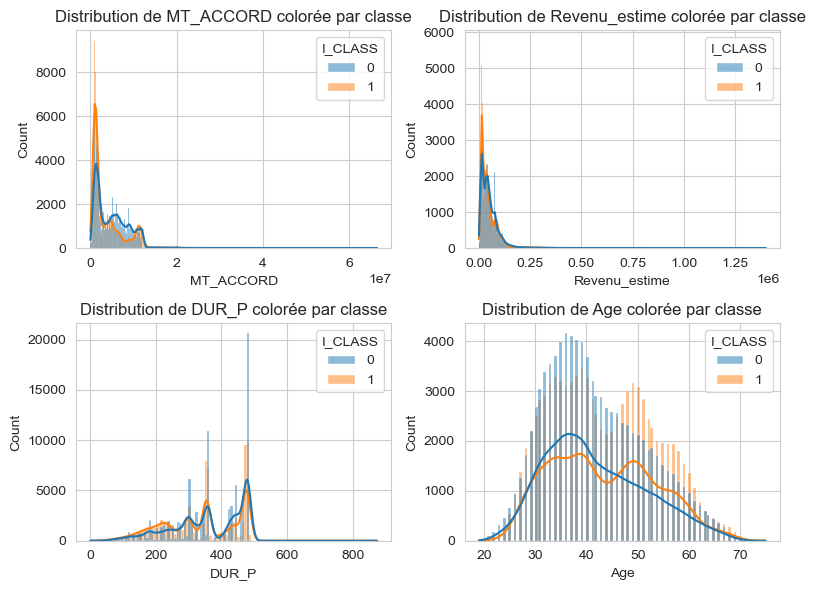

In [51]:

cols_per_row = 2
num_rows = len(colonnes_numeriques) // cols_per_row + int(len(colonnes_numeriques) % cols_per_row != 0)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(8, num_rows * 3))

axes = axes.flatten()

# loop on numerical columns to create each plot
for i, col in enumerate(colonnes_numeriques):
    g = sns.histplot(df, x=col, hue="I_CLASS", kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {col} colorée par classe')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

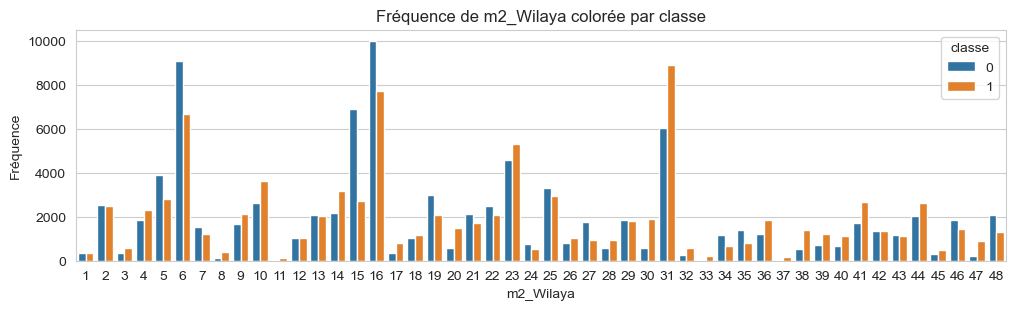

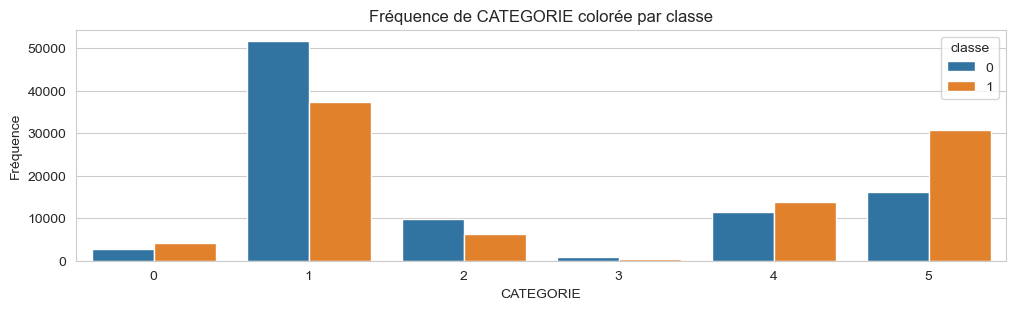

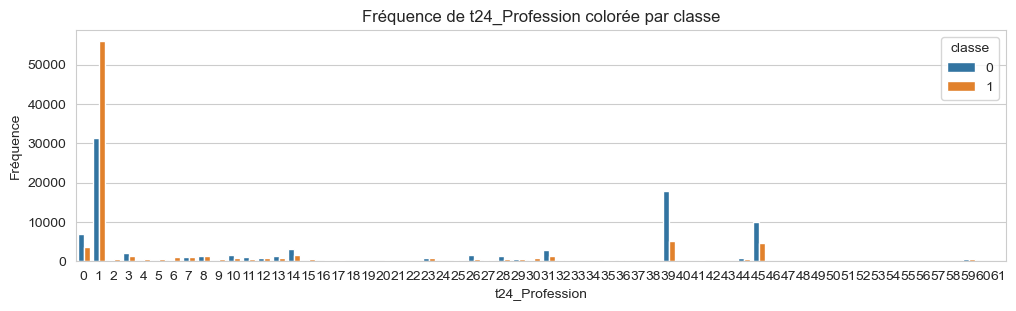

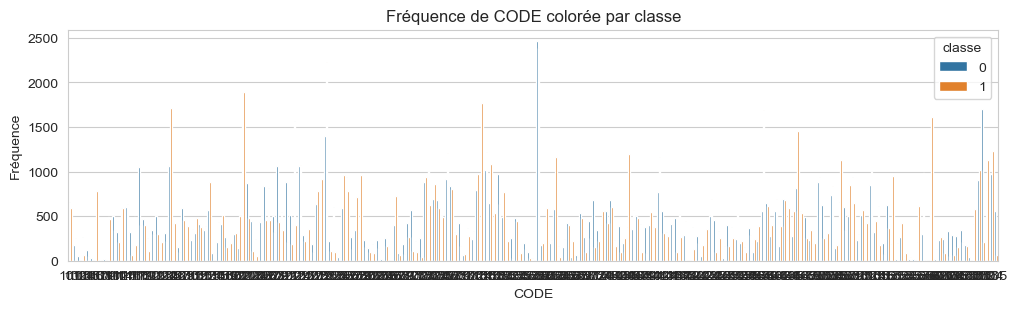

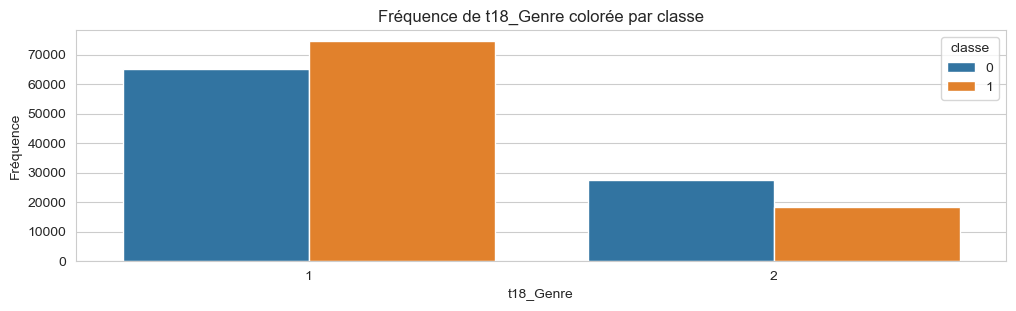

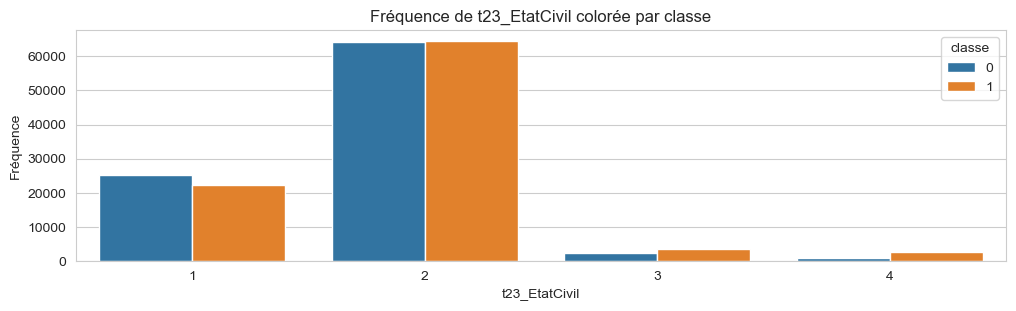

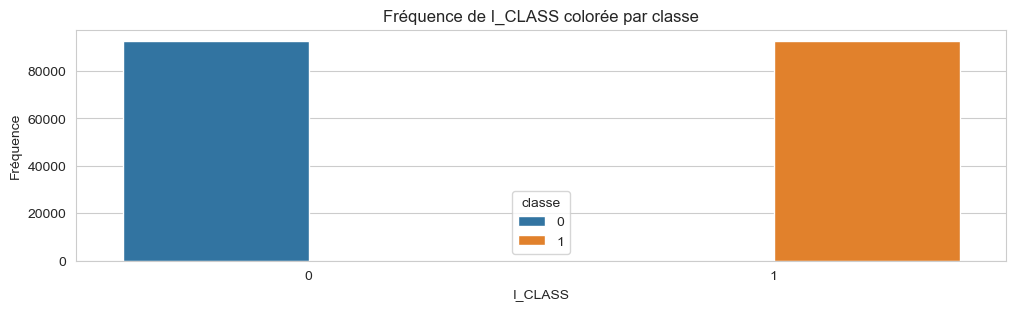

In [47]:
# Bar char for each categorical column
for col in colonnes_categorielles:
    plt.figure(figsize=(12, 3))
    sns.countplot(data=df, x=col, hue="I_CLASS")
    plt.title(f'Fréquence de {col} colorée par classe')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.legend(title='classe')
    plt.show()

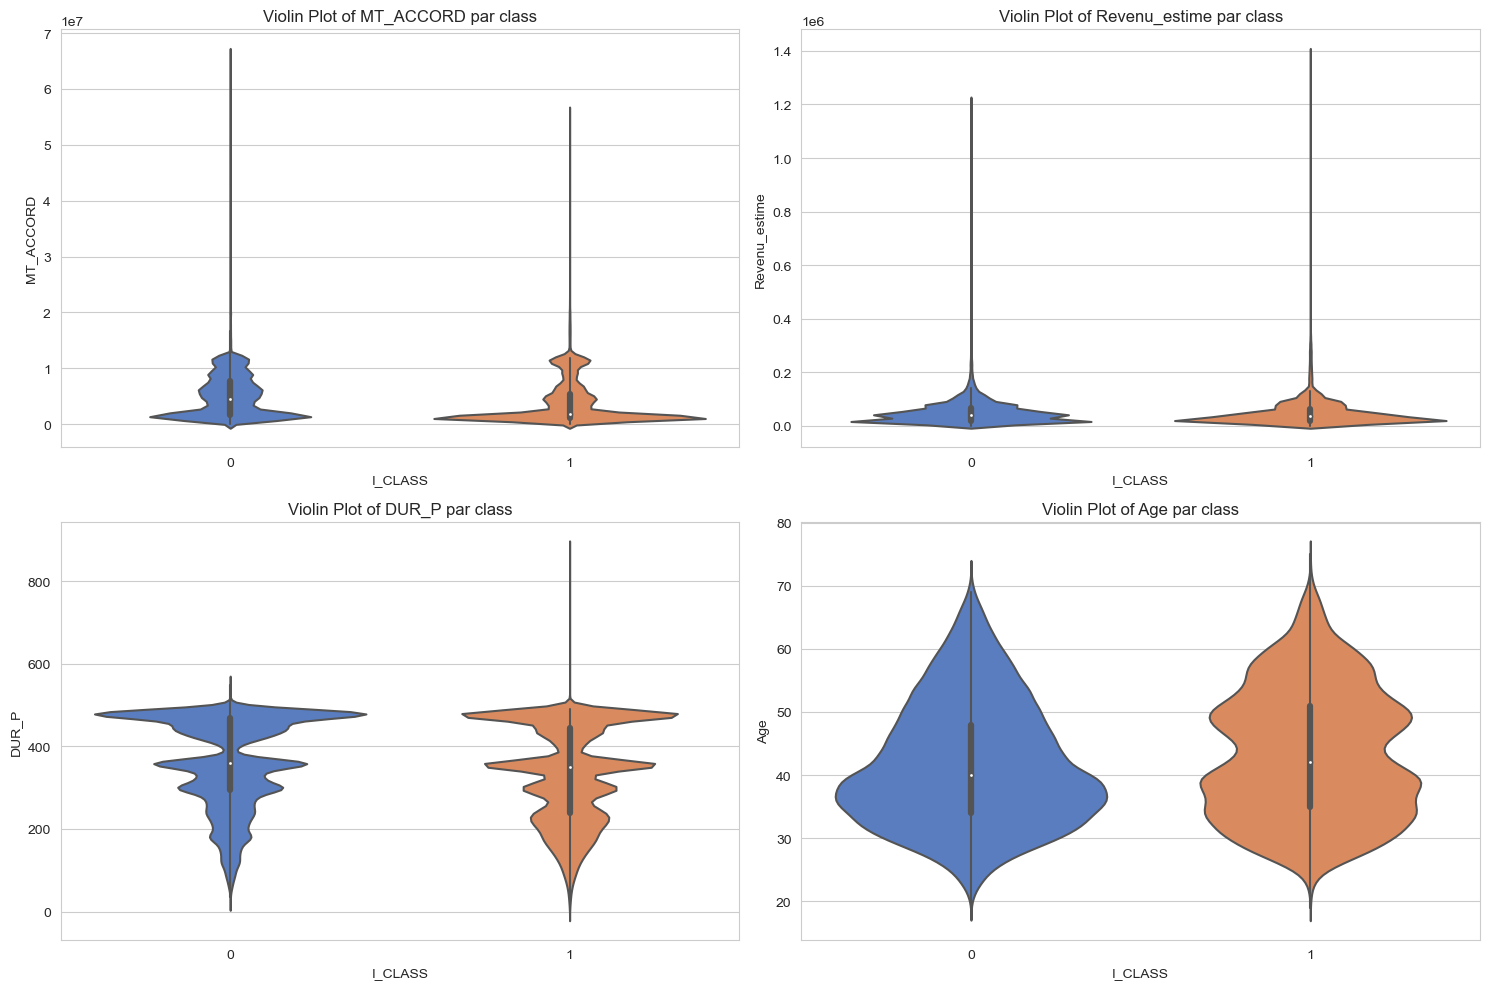

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


# Violin plots

cols_per_row = 2
num_rows = len(colonnes_numeriques) // cols_per_row + int(len(colonnes_numeriques) % cols_per_row != 0)
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, num_rows * 5))


axes = axes.flatten()

for i, col in enumerate(colonnes_numeriques):
    sns.violinplot(x='I_CLASS', y=col, data=df, palette='muted', ax=axes[i])
    axes[i].set_title(f'Violin Plot of {col} par class')
    axes[i].set_xlabel('I_CLASS')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariate Analysis

In [ ]:
sns.set_style('whitegrid') 
sns.pairplot(df, hue = 'I_CLASS')
plt.show()